# **실습 4-1 : Auto Encoder/Denoise AE** 


## **Import Module**

In [0]:
%tensorflow_version 2.x

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, datasets, models, utils

tf.__version__

TensorFlow 2.x selected.


'2.0.0'

## **DataSet**

### Load

In [0]:
# options
# select dataset : fashion_mnist or mnist
#fashion_mnist_on = False  # True/False
fashion_mnist_on = False

# select noise on/off : on 시 denoising  
#noise_on = True  # True/False
noise_on = True

In [0]:
if fashion_mnist_on :
  (x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()
  print("Fashion_mnist loaded")
else :
  (x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
  print("MNIST loaded")


11493376/11490434 [==============================] - 0s 0us/step
MNIST loaded


In [0]:
x_train.shape[0], len(x_train)

(60000, 60000)

### Preprocessing

Noisy Data Selected
(60000, 784)
(10000, 784)


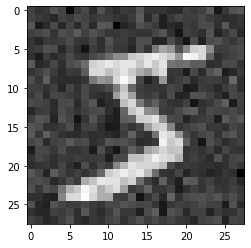

In [0]:
# Normalize
x_train, x_test = x_train/255., x_test/255.

# Dense layer 입력에 맞추어 shape 변환
# (60000,784) <- (60000,28,28)
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

if noise_on : 
  x_train = x_train + 0.1*np.random.randn(x_train.shape[0], 784)
  x_test = x_test + 0.1*np.random.randn(x_test.shape[0], 784)
  print("Noisy Data Selected")

# Print out the shape
print(x_train.shape)
print(x_test.shape)

plt.imshow(x_train[0].reshape(28,28), cmap='gray')
plt.show()



```
# This is formatted as code
```

- np.random.rand(5)  
array([0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ])  
- randn : 평균이 0이고 표준편차가 1인 표준 정규 분포  
np.random.randn(5)  
array([-0.30237513, -2.2244036 ,  0.72400636,  0.35900276,  1.07612104])  
- np.random.randint(10, 20, size=10)  
array([10, 19, 16, 15, 13, 11, 18, 10, 14, 19])  


## **Model**

### Define

In [0]:
from tensorflow.keras import regularizers 

# Size of encoded representation
# 784 -> 32 : compression factor 24.5 
encoding_dim = 10 #32

### Functional API ###
# Input placeholder
i_input = layers.Input(shape=(784,))

# Encoded representation of input image
encode_1 = layers.Dense(encoding_dim, activation='sigmoid')(i_input)
encode_2 = layers.Dense(encoding_dim, activation='sigmoid',
              activity_regularizer = regularizers.l2(0.005))(i_input)

# Decode is lossy reconstruction of input              
decoded_1 =  layers.Dense(784, activation='sigmoid')(encode_1)
decoded_2 =  layers.Dense(784, activation='sigmoid')(encode_2)

In [0]:
# This autoencoder will map input to reconstructed output
autoencoder1 =  models.Model(inputs=i_input, outputs=decoded_1, name='ae-1')
autoencoder2 =  models.Model(inputs=i_input, outputs=decoded_2, name='ae-2')

In [0]:
# Select optimizer and loss function
autoencoder1.compile(optimizer='rmsprop', loss='mse') 
autoencoder2.compile(optimizer='rmsprop', loss='mse')
autoencoder1.summary()
autoencoder2.summary()

Model: "ae-1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 784)               8624      
Total params: 16,474
Trainable params: 16,474
Non-trainable params: 0
_________________________________________________________________
Model: "ae-2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
____________________________________________

### Fit

Epoch 100/100
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0640 - val_loss: 0.0636
CPU times: user 1min 27s, sys: 9.37 s, total: 1min 37s

Wall time: 1min 12s (@Notebook Setting/GPU)

In [0]:
%%time
epoch_n = 60
batch_size_n = 512
### Model-1 ###
autoencoder1.fit(x_train, x_train,
                epochs=epoch_n,
                batch_size=batch_size_n,
                validation_freq=10,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/60
60000/60000 [==============================] - 3s 47us/sample - loss: 0.1518
Epoch 2/60
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0884
Epoch 3/60
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0786
Epoch 4/60
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0774
Epoch 5/60
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0773
Epoch 6/60
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0773
Epoch 7/60
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0773
Epoch 8/60
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0773
Epoch 9/60
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0773
Epoch 10/60
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0773 - val_loss: 0.0774
Epoch 11/60
60000/60000 [=========================

Epoch 100/100
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0172 - val_loss: 0.0170
CPU times: user 1min 14s, sys: 8.23 s, total: 1min 22s

Wall time: 1min 15s

In [0]:
%%time
autoencoder2.fit(x_train, x_train,
                epochs=epoch_n,
                batch_size=batch_size_n,
                validation_freq=10,
                shuffle=True,
                verbose=1,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/60
60000/60000 [==============================] - 1s 23us/sample - loss: 0.1907
Epoch 2/60
60000/60000 [==============================] - 1s 14us/sample - loss: 0.1247
Epoch 3/60
60000/60000 [==============================] - 1s 13us/sample - loss: 0.1012
Epoch 4/60
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0896
Epoch 5/60
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0823
Epoch 6/60
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0772
Epoch 7/60
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0733
Epoch 8/60
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0703
Epoch 9/60
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0679
Epoch 10/60
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0659 - val_loss: 0.0649
Epoch 11/60
60000/60000 [=========================

## **Analysis**

### Predict

In [0]:
decoded_imgs1 = autoencoder1.predict(x_test)
decoded_imgs2 = autoencoder2.predict(x_test)

### Plot

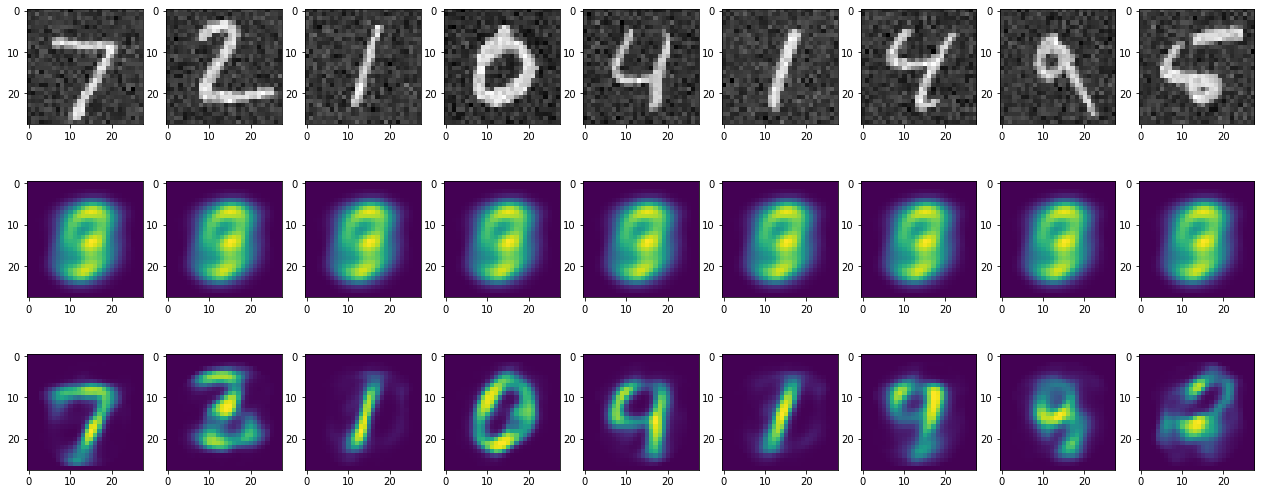

In [0]:
# use Matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 9))

num_imgs = 9

for i in range(num_imgs):                        
    # display original
    ax = plt.subplot(3, num_imgs, i + 1)
    true_img = x_test[i].reshape(28, 28)
    plt.imshow(true_img, cmap='gray')

    # display reconstruction 1
    ax = plt.subplot(3, num_imgs, i + 1 + num_imgs)
    reconstructed_img = decoded_imgs1[i].reshape(28,28)
    plt.imshow(reconstructed_img)#, cmap='gray')

    # display reconstruction 2
    ax = plt.subplot(3, num_imgs, i + 1 + num_imgs*2)
    reconstructed_img = decoded_imgs2[i].reshape(28,28)
    plt.imshow(reconstructed_img)#, cmap="gray")

plt.show()

## **실습 과제**

### 과제 1. 두 모델의 차이를 확인해 보자 
#### -- Regularization은 모델이 커서 overfiting이 발생하는 것을 막기위해서 사용한다. 이 모델은 매우 작은 모델인데, Regularizor가 성능을 좋게 하는 이유가 무었일까 생각해 보자
#### -- 생각을 적어 보자: 




Regularization을 하면 overfitting을 막을 수 있다.

L2를 쓰는 것과 마찬가지. 어떤 노드가 끌고가지 못하도록 막아주면서 학습이 안정화되는 경향이 보인다.

그래서 L2를 쓰면 대부분의 경우에 성능이 좋아진다. encoding되는 노드들이 웨이트를 적당히 분산할 수 있도록 하는 역할을 한다.


### 과제 2. Data set에 noise 가 추가 되는 경우 어떻게 동작하는지 확인해 보자
#### -- dataset을 읽어 오는 cell 에서 "noise_on = False" 를 "True"로 변경하자
#### -- Noisy data로 다시 학습해 보자. Noise가 잘 제거 되었는가? 
#### -- DataSet을 변경하여 결과를 확인해 보자


Regularization이 된 autoencoder2의 경우에는 되지 않은 autoencoder1에 비해서는 뚜렷하지만 여전히 노이즈가 남아있는 것을 확인할 수 있다.

데이터 셋을 바꾼 경우에는(fashion mnist) 더 안좋은 결과가 나오는 것을 볼 수 있다. 

### 과제 3. DataSet을 MNIST로 하고, `noise_on =`를 False로, `encoding_dim =`을 10으로 설정하여 학습하고, 학습된 가중치(weight)들을 image로 확인해 보자
#### -- 아래 코드를 실행하고, 결과를 분석해 보자 
#### -- 마지막 그림은 무엇을 보여주는지 적어보자: 



위의 이미지의 밝기가 weight. 그러면 데이터의 분산이 어떠한가?
위의 것은 특징들이 잘 보이지 않는다.

아래의 첫번째 그림은 첫번째 줄은 첫번째에서 간 weight, 두번쨰는 두번째에서 간 weight.
뭔가 패턴이 반복되는 것을 볼 수 있다. 

그리고 dimg를 통해서 호출해준 아래의 이미지에서 행은 0부터 9까지의 확률, 즉 encoding dim을 나타내는 것이고, 하단에 나타나는 이미지는 이렇게 만들어진 784개를 모아서 하나의 이미지로 바꾼 것이다.

regularizer를 사용하지 않았을 때는 어떤 패턴이 드러나지 않는 반면 regularizer를 사용할 경우에는 어떤 패턴이 나타나는 것을 볼 수 있었다. 이를 통해서 알 수 있었던 것은 regularizer를 사용했을 때 더 좋은 값이 나온다는 사실이다.





## 과제3 code  


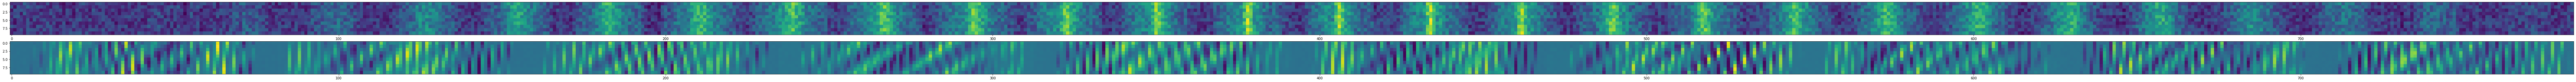

In [0]:
dim=10

f1=autoencoder1.get_weights()
plt.figure(figsize=(200, 4))
plt.subplot(2,1,1)
# Encoder_1 Dense Layer의 W(784x10=7840) 읽음
img = f1[0] 
dimg = img.reshape(784,dim) # (784,10)<- (7840)
plt.imshow(dimg) 
dimgT = np.transpose(dimg)
plt.imshow(dimgT)

plt.subplot(2,1,2)
f2=autoencoder2.get_weights()
# Encoder_2 Dense Layer의 W(784x10=7840) 읽음
img2 = f2[2]
dimg2 = img2.reshape(784,dim) # (784,10)<- (7840)
dimg2T = np.transpose(dimg2)
plt.imshow(dimg2T)

plt.show()

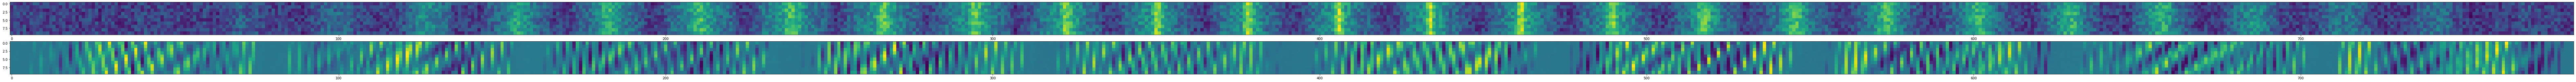

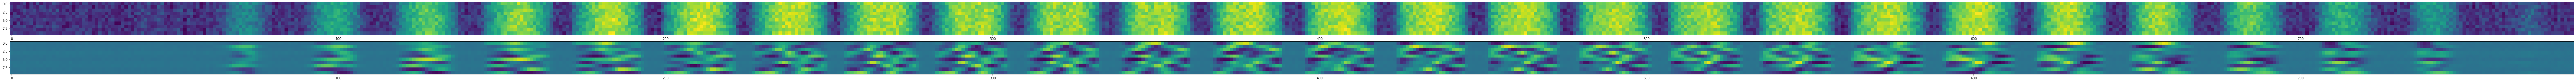

In [0]:
f1=autoencoder1.get_weights()
plt.figure(figsize=(200,4))
plt.subplot(2,1,1)
# Decoder_1 Dense Layer의 W(10x784=7840) 읽음
img = f1[2]
dimg = img.reshape(dim,784) #(10,784)<-(7840)
plt.imshow(dimg)

plt.subplot(2,1,2)
f2=autoencoder2.get_weights()
img = f2[2]
# Decoder_2 Dense Layer의 W(10x784=7840) 읽음
dimg = img.reshape(dim,784)
plt.imshow(dimg)

plt.show()

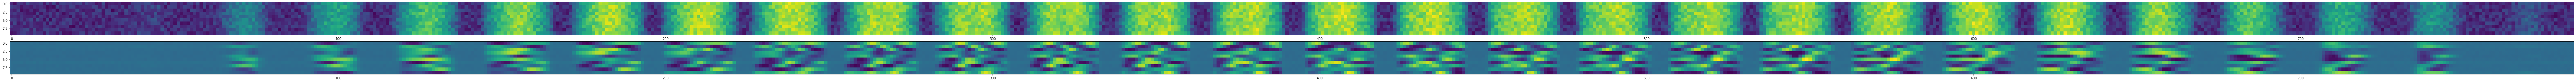

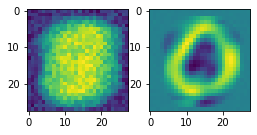

In [0]:
i=2
plt.figure(figsize=(4,8))
plt.subplot(1,2,1)
f1=autoencoder1.get_weights()
f2=autoencoder2.get_weights()
img = f1[2]
dimg = img.reshape(dim,784)
dim_1 = dimg[i:i+1,:].reshape(28,28)
plt.imshow(dim_1)

plt.subplot(1,2,2)

img2 = f2[2]
dimg2 = img2.reshape(dim, 784)
dim_2 = dimg2[i:i+1,:].reshape(28,28)
plt.imshow(dim_2)


plt.show()

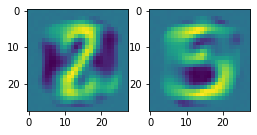